<a href="https://colab.research.google.com/github/Propp007/Pythonic-AI-Book/blob/main/Build_our_first_ANN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build our first ANN model

*Modified National Institute of Standards and Technology (**MNIST**) database*

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


*testing the data type*

In [ ]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


*Plotting image data*

1) imshow (matplotlib)

Actual value of the digit: 5


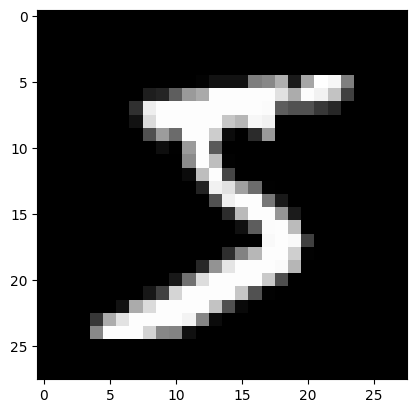

In [19]:
plt.imshow(x_train[0], cmap='gray')
print("Actual value of the digit: {0}".format(y_train[0]))

2)array_to_img (Keras)

In [20]:
tf.keras.utils.array_to_img(x_train[0].reshape(28,28,1))


## Image pre-processing


In [21]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


*Min-max normalization*

In [22]:
x_train=x_train/255.0
x_test=x_test/255.0

## Building the model

### Sequential API

In [23]:
model =tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, input_shape=((784, )), activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

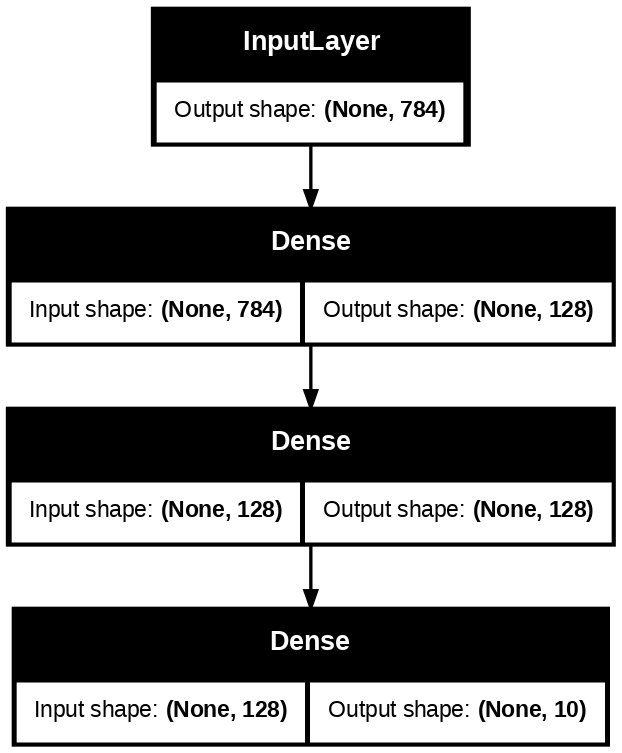

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', dpi=120, show_shapes=True)

### InputLayer method

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer((784,)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add( tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10))


### + Flatten layer (no pre-processing in this way)


In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Functional API

In [24]:
inputs = tf.keras.Input((784,))
hidden_1 = tf.keras.layers.Dense(128, activation='relu')(inputs)
hidden_2 = tf.keras.layers.Dense(128, activation='relu')(hidden_1)
outputs = tf.keras.layers.Dense(10)(hidden_2)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

## Training and Evaluation

### Compilation

In [25]:
model.compile(
optimizer=tf.keras.optimizers.Adam(0.001),
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)


### Fit and train

In [26]:
history = model.fit(x_train, y_train, epochs=50, batch_size=50, steps_per_epoch=200,verbose=2,validation_steps=50,validation_split=0.2)

Epoch 1/50
200/200 - 2s - 9ms/step - loss: 0.5659 - sparse_categorical_accuracy: 0.8459 - val_loss: 0.3481 - val_sparse_categorical_accuracy: 0.8936
Epoch 2/50
200/200 - 1s - 3ms/step - loss: 0.2601 - sparse_categorical_accuracy: 0.9232 - val_loss: 0.2601 - val_sparse_categorical_accuracy: 0.9260
Epoch 3/50
200/200 - 1s - 3ms/step - loss: 0.2306 - sparse_categorical_accuracy: 0.9321 - val_loss: 0.2001 - val_sparse_categorical_accuracy: 0.9416
Epoch 4/50
200/200 - 1s - 3ms/step - loss: 0.1769 - sparse_categorical_accuracy: 0.9477 - val_loss: 0.1326 - val_sparse_categorical_accuracy: 0.9656
Epoch 5/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


200/200 - 1s - 4ms/step - loss: 0.1495 - sparse_categorical_accuracy: 0.9478 - val_loss: 0.1014 - val_sparse_categorical_accuracy: 0.9512
Epoch 6/50
200/200 - 2s - 12ms/step - loss: 0.1214 - sparse_categorical_accuracy: 0.9643 - val_loss: 0.1787 - val_sparse_categorical_accuracy: 0.9444
Epoch 7/50
200/200 - 1s - 3ms/step - loss: 0.1190 - sparse_categorical_accuracy: 0.9645 - val_loss: 0.1483 - val_sparse_categorical_accuracy: 0.9560
Epoch 8/50
200/200 - 1s - 3ms/step - loss: 0.1066 - sparse_categorical_accuracy: 0.9683 - val_loss: 0.0983 - val_sparse_categorical_accuracy: 0.9700
Epoch 9/50
200/200 - 1s - 3ms/step - loss: 0.1068 - sparse_categorical_accuracy: 0.9683 - val_loss: 0.1024 - val_sparse_categorical_accuracy: 0.9688
Epoch 10/50
200/200 - 1s - 4ms/step - loss: 0.1076 - sparse_categorical_accuracy: 0.9607 - val_loss: 0.0725 - val_sparse_categorical_accuracy: 0.9580
Epoch 11/50
200/200 - 3s - 16ms/step - loss: 0.0748 - sparse_categorical_accuracy: 0.9777 - val_loss: 0.1210 - val_

#### *Evaluate the model*

In [27]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1228 - sparse_categorical_accuracy: 0.9714


[0.1074238270521164, 0.9747999906539917]

*Comparing the actual and the predicted values*

In [28]:
y_pred = model.predict(x_test)
print(y_test[0])
print(y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
7
[-10.263653   -4.076176   -4.792447    3.6393163 -21.952225   -6.388808
 -24.485523   14.310102   -7.095845    0.1447013]


*Plottin the loss and metrics values*

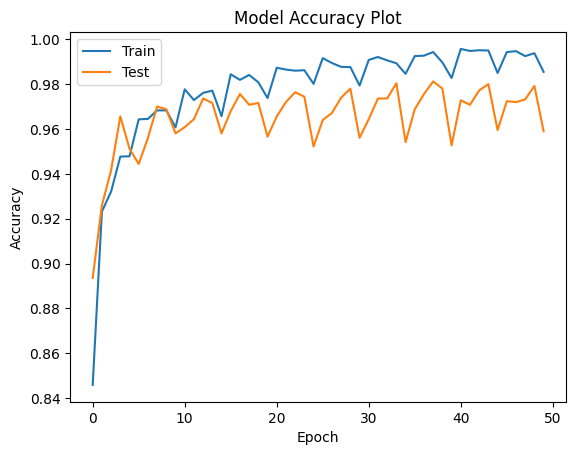

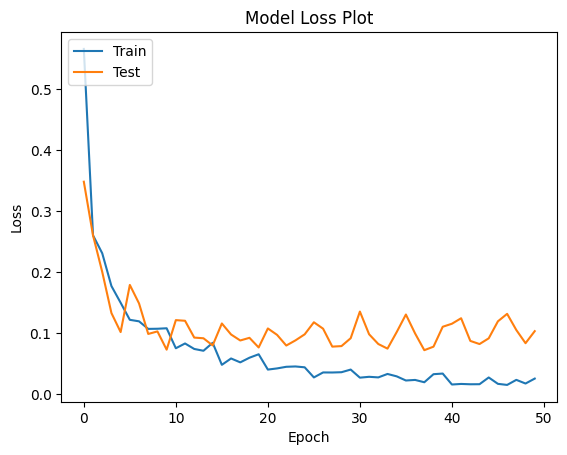

In [29]:
# Model Accuracy Plot
plt.plot(history.history["sparse_categorical_accuracy"])
plt.plot(history.history["val_sparse_categorical_accuracy"])
plt.title("Model Accuracy Plot")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

# Model Loss Plot
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()